In [1]:
from keras.applications.inception_resnet_v2 import InceptionResNetV2
from keras.models import load_model, Model, Sequential
from keras.layers import Input, Dense
from keras.preprocessing import image
from keras.applications.inception_resnet_v2 import preprocess_input, decode_predictions

import numpy as np
from keras.utils.np_utils import to_categorical
import glob
import os

Using TensorFlow backend.


In [2]:
model = load_model('C:/Datasets/scene-classification/models/irnv2_v3_adam-contrain-10-0.96.hdf5')

In [3]:
categories = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

In [4]:
def load_validation_data(file_path):
    x_val = []
    y_val = []
    
    images = glob.glob(file_path + '/**/*')
    for photo in images:
        img = image.load_img(photo, target_size=(299, 299))
        tr_x = image.img_to_array(img)
        tr_x = preprocess_input(tr_x)
        label = (photo.split('\\')[1][2:])
        label_place = categories.index(label)
        
        x_val.append(tr_x)
        y_val.append(label_place)
        
    return np.array(x_val), to_categorical(y_val)

In [6]:
x_val, y_val = load_validation_data('C:/Datasets/scene-classification/data/valid/')

In [7]:
type(x_val)

numpy.ndarray

In [8]:
x_val.shape

(2034, 299, 299, 3)

In [9]:
y_pred = model.predict(x_val, batch_size=32, verbose=1)

2034/2034 [==============================] - 29s 14ms/step


In [10]:
from sklearn.metrics import confusion_matrix

In [11]:
y_val.shape

(2034, 6)

In [12]:
y_val_class = [np.argmax(_y) for _y in y_val]

In [13]:
y_pred.shape

(2034, 6)

In [14]:
y_pred_class = [np.argmax(_y) for _y in y_pred]

In [16]:
print(len(y_val_class), len(y_pred_class))

2034 2034


In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

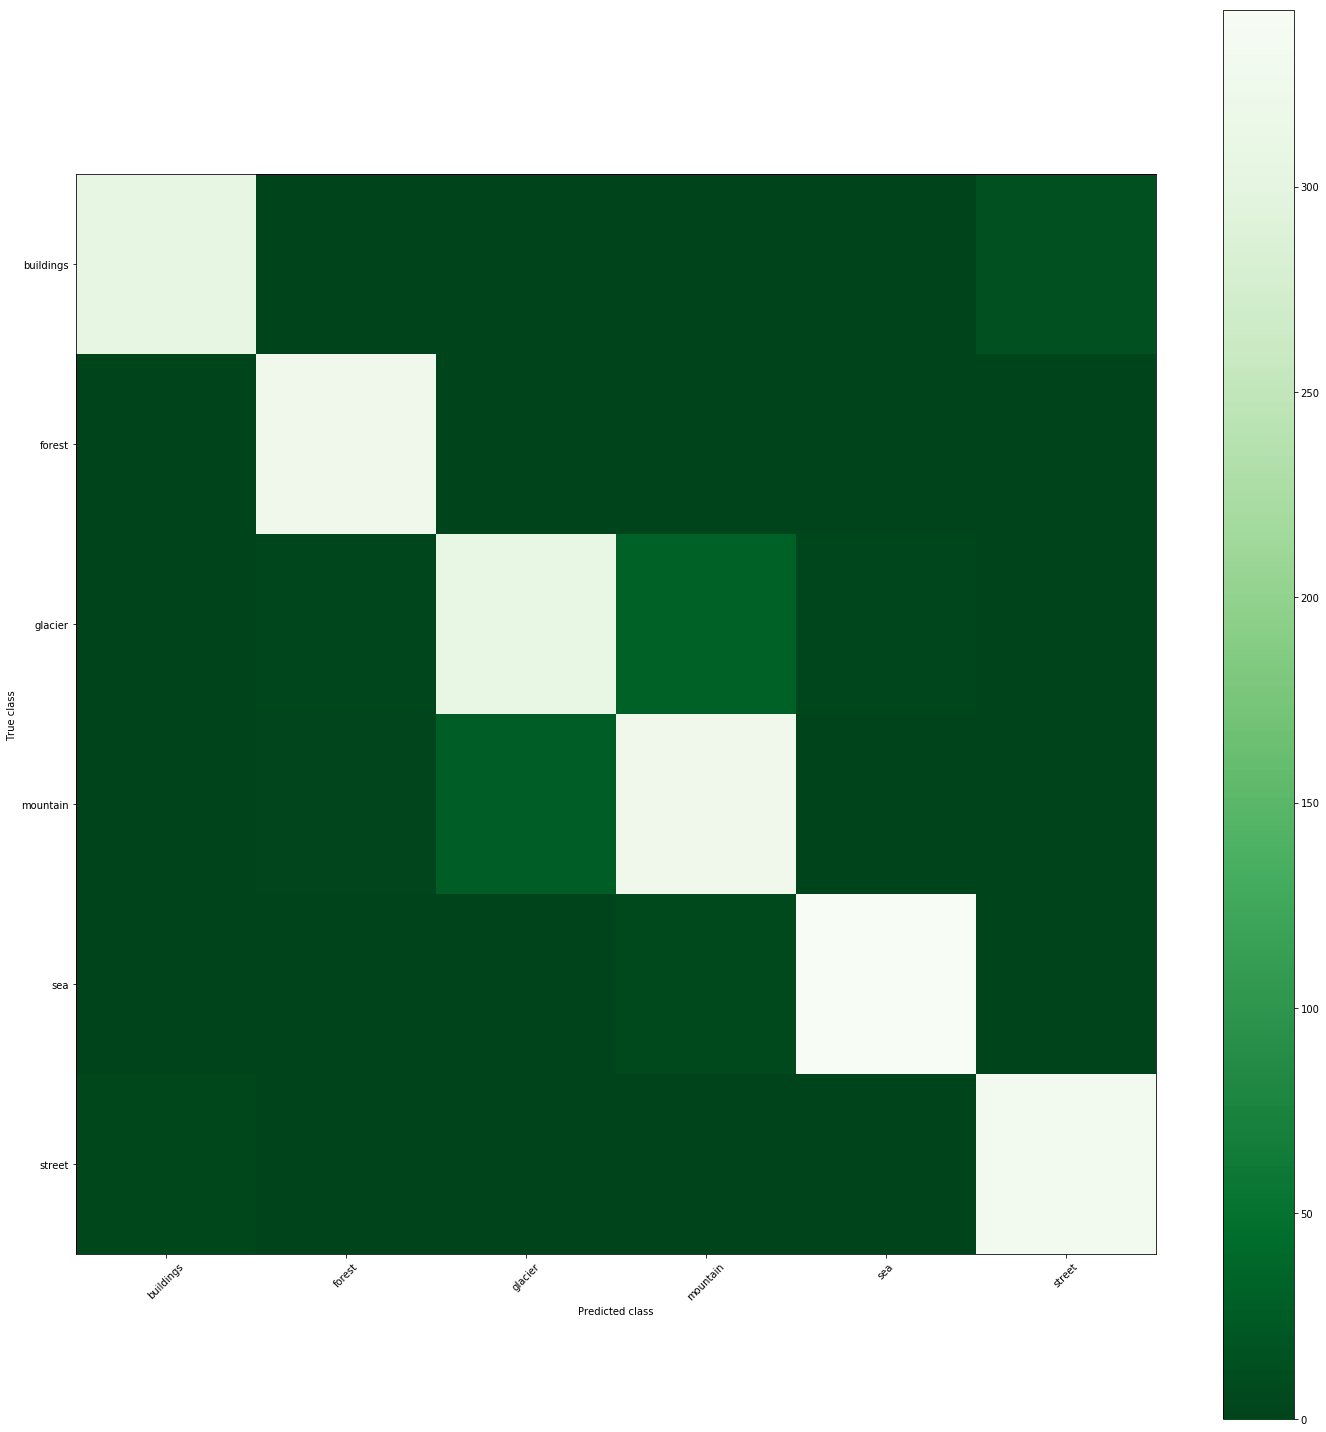

In [24]:
c = confusion_matrix(y_val_class, y_pred_class)
plt.figure(figsize=(20, 20))
plt.imshow(c, interpolation='nearest', cmap='Greens_r')
plt.colorbar()
ticks = np.arange(len(categories))
plt.xticks(ticks, categories, rotation=45)
plt.yticks(ticks, categories)

plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.tight_layout()

Required: mountain-glacier auxiliary classifier